In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import string
import nltk
import re
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.util import ngrams
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.naive_bayes import GaussianNB
from sklearn import datasets

In [2]:
#download nltk functions
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\leoda\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\leoda\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\leoda\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\leoda\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\leoda\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [3]:
#set pd options
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', 200)

In [4]:
#read in csv file
df_data = pd.read_csv("labeled_data.csv")

In [5]:
#view data frame
df_data.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;


In [6]:
#delete unnamed column
df_data = df_data.drop(columns=['Unnamed: 0'])

In [7]:
#Remove @Usernames
tweets_usernames_removed=[]
row = 0
for i in df_data['tweet']:
    text = ' '.join(re.sub("([@#][A-Za-z0-9_]+)|(\w+:\/\/\S+)"," ", i).split())
    tweets_usernames_removed.append(text)

In [8]:
#Remove Retweet tag:  RT
tweets_sub=[]
from itertools import count
for i in range(len(tweets_usernames_removed)):
  results=re.sub(r"RT", " ", tweets_usernames_removed[i])
  tweets_sub.append(results)

In [9]:
#Remove punctuation
tweets_cleaned = []
regex = re.compile("[^a-zA-Z ]")
for i in range(len(tweets_sub)):
    re_clean = regex.sub('', tweets_sub[i])
    tweets_cleaned.append(re_clean)
                

In [10]:
#Print tweets cleaned list
print(tweets_cleaned)

['    As a woman you shouldnt complain about cleaning up your house amp as a man you should always take the trash out', '    boy dats coldtyga dwn bad for cuffin dat hoe in the st place', '   Dawg    You ever fuck a bitch and she start to cry You be confused as shit', '    she look like a tranny', '    The shit you hear about me might be true or it might be faker than the bitch who told it to ya  ', '  The shit just blows meclaim you so faithful and down for somebody but still fucking with hoes    ', '  I can not just sit up and HATE on another bitch  I got too much shit going on', '   cause Im tired of you big bitches coming for us skinny girls ', ' amp you might not get ya bitch back amp thats that ', ' hobbies include fighting Mariam bitch', ' Keeks is a bitch she curves everyone  lol I walked into a conversation like this Smh', ' Murda Gang bitch its Gang Land ', ' So hoes that smoke are losers   yea  go on IG', ' bad bitches is the only thing that i like ', ' bitch get up off me '

In [11]:
#Assign new column labeled "cleaned_tweets" to original dataframe and populate with data from tweets_cleaned list
df_data_cleaned = df_data.assign(cleaned_tweets = tweets_cleaned)

In [12]:
#drop tweet column from df_data_cleaned
df_data_cleaned = df_data_cleaned.drop(columns=['tweet'])
df_data_cleaned.head(30)

,count,hate_speech,offensive_language,neither,class,cleaned_tweets
0,3,0,0,3,2,As a woman you shouldnt complain about cleaning up your house amp as a man you should always take the trash out
1,3,0,3,0,1,boy dats coldtyga dwn bad for cuffin dat hoe in the st place
2,3,0,3,0,1,Dawg You ever fuck a bitch and she start to cry You be confused as shit
3,3,0,2,1,1,she look like a tranny
4,6,0,6,0,1,The shit you hear about me might be true or it might be faker than the bitch who told it to ya
5,3,1,2,0,1,The shit just blows meclaim you so faithful and down for somebody but still fucking with hoes
6,3,0,3,0,1,I can not just sit up and HATE on another bitch I got too much shit going on
7,3,0,3,0,1,cause Im tired of you big bitches coming for us skinny girls
8,3,0,3,0,1,amp you might not get ya bitch back amp thats that
9,3,1,2,0,1,hobbies include fighting Mariam bitch


In [13]:
#Start Sentiment Section

In [14]:
# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

In [15]:
# Analyze data in df_data_cleaned
all_lines = []
i = 0
for index, row in df_data_cleaned.iterrows():
    try:
        #sentiment scoring with VADER 
        line_sentiment = analyzer.polarity_scores(row["cleaned_tweets"])
        all_lines.append(line_sentiment)

    except AttributeError:
        pass
    
all_lines[0:2]

[{'neg': 0.0, 'neu': 0.9, 'pos': 0.1, 'compound': 0.2755},
 {'neg': 0.226, 'neu': 0.774, 'pos': 0.0, 'compound': -0.5423}]

In [16]:
#assign sentiment data to new data frame "sentiment_df"
sentiment_df = pd.DataFrame(all_lines)

#Join sentiment_df to df_data_cleaned
sentiment_df = sentiment_df.join(df_data_cleaned)
sentiment_df.head()
sentiment_df.describe()

,neg,neu,pos,compound,count,hate_speech,offensive_language,neither,class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,0.261961,0.630675,0.106561,-0.269340,3.243473,0.280515,2.413711,0.549247,1.110277
std,0.230242,0.237125,0.145129,0.479265,0.883060,0.631851,1.399459,1.113299,0.462089
min,0.000000,0.000000,0.000000,-0.993000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.469000,0.000000,-0.659700,3.000000,0.000000,2.000000,0.000000,1.000000
50%,0.251000,0.623000,0.000000,-0.361200,3.000000,0.000000,3.000000,0.000000,1.000000
75%,0.415000,0.792000,0.190000,0.000000,3.000000,0.000000,3.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.983400,9.000000,7.000000,9.000000,9.000000,2.000000


In [17]:
#create new data frame with only tweets with neg sentiment greater than .5 and class is hate speech
df_neg_tweets = sentiment_df.where(sentiment_df['neg']> 0.261961).dropna()
df_neg_hate_tweets=df_neg_tweets.where(df_neg_tweets['class']== 0).dropna()

In [18]:
df_neg_tweets['class'].value_counts()

1.0    10688
0.0      788
2.0      470
Name: class, dtype: int64

In [19]:
#create new data frame with only tweets with neg sentiment greater than .5 and class is offensive speech
df_neg_offensive_tweets=df_neg_tweets.where(df_neg_tweets['class']== 1).dropna()

In [20]:
#create new data frame with only tweets with neu sentiment greater than .5 and class is neither
df_neu_tweets = sentiment_df.where(sentiment_df['neu']> 0.630675).dropna()
df_neu_neither_tweets = df_neu_tweets.where(df_neu_tweets['class']==2).dropna()

In [21]:
df_hate_neutral_comb_tweets=df_neu_neither_tweets.append(df_neg_hate_tweets)
df_hate_neutral_comb_tweets['class'].value_counts()

C:\Users\leoda\AppData\Local\Temp\ipykernel_32952\1882671217.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_hate_neutral_comb_tweets=df_neu_neither_tweets.append(df_neg_hate_tweets)


2.0    3308
0.0     788
Name: class, dtype: int64

In [56]:
df_hate_neutral_comb_tweets

,neg,neu,pos,compound,count,hate_speech,offensive_language,neither,class,cleaned_tweets
0,0.000,0.900,0.100,0.2755,3.0,0.0,0.0,3.0,2.0,As a woman you shouldnt complain about cleaning up your house amp as a man you should always take the trash out
40,0.239,0.761,0.000,-0.2960,3.0,0.0,1.0,2.0,2.0,momma said no pussy cats inside my doghouse
63,0.000,1.000,0.000,0.0000,3.0,0.0,0.0,3.0,2.0,SimplyAddictedToGuys woof woof hot scally lad
66,0.000,1.000,0.000,0.0000,3.0,0.0,1.0,2.0,2.0,woof woof and hot soles
67,0.000,0.763,0.237,0.4215,3.0,0.0,1.0,2.0,2.0,Lemmie eat a Oreo amp do these dishes One oreo Lol
...,...,...,...,...,...,...,...,...,...,...
24488,0.452,0.548,0.000,-0.5106,3.0,2.0,1.0,0.0,0.0,tell the hating niggah stfu
24523,0.381,0.619,0.000,-0.9169,3.0,3.0,0.0,0.0,0.0,the receptionist im always forced to talk to is such a racist cunt i called her for an error and she said shell call me mins nothing
24576,0.423,0.577,0.000,-0.6597,3.0,2.0,1.0,0.0,0.0,this guy is the biggest faggot omfg
24751,0.333,0.667,0.000,-0.5423,3.0,2.0,1.0,0.0,0.0,you a pussy ass nigga and I know it nigga


In [ ]:
df_original_tweets = df_data_cleaned.where(df_data_cleaned['class'] != 1).dropna()
df_original_tweets

In [63]:
####Vectorizing tweets
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_original_tweets['cleaned_tweets'], df_original_tweets['class'], test_size=0.33, random_state=0)

count_vectorizer = CountVectorizer(stop_words='english')
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)

tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

hashing_vectorizer = HashingVectorizer(stop_words='english', decode_error='ignore', n_features=2 ** 20, 
                                       alternate_sign=False)
hashing_train = hashing_vectorizer.fit_transform(X_train)
hashing_test = hashing_vectorizer.transform(X_test)

In [64]:
# train = MinMaxScaler().fit_transform(df[cols].loc[X_train.index])
# test = MinMaxScaler().fit_transform(df[cols].loc[X_test.index])

In [65]:
from scipy import sparse

n_fts_train = sparse.csr_matrix(hashing_train)
n_fts_test = sparse.csr_matrix(hashing_test)

In [66]:
# data_train_bow = sparse.hstack((count_train, n_fts_train))
# data_test_bow = sparse.hstack((count_test, n_fts_test))

# data_train_tfidf = sparse.hstack((tfidf_train, n_fts_train))
# data_test_tfidf = sparse.hstack((tfidf_test, n_fts_test))

# data_train_hashing = sparse.hstack((hashing_train, n_fts_train))
# data_test_hashing = sparse.hstack((hashing_test, n_fts_test))


In [67]:
datasets = {'BoW': [count_train, count_test], 
            'Tf-idf': [tfidf_train, tfidf_test],
            'Hashing': [hashing_train, hashing_test]}

In [68]:
import time
from sklearn.linear_model import PassiveAggressiveClassifier, Perceptron, SGDClassifier
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn import metrics
from sklearn.model_selection import cross_val_score

from sklearn.metrics import plot_confusion_matrix, confusion_matrix

classifiers = [PassiveAggressiveClassifier(n_jobs=-1, random_state=0), 
               SGDClassifier(n_jobs=-1, random_state=0),
               Perceptron(n_jobs=-1, random_state=0),
               RandomForestClassifier(n_estimators=300, max_depth=30, n_jobs=-1, random_state=0),
               MultinomialNB(),
               ComplementNB(),
               LinearSVC(random_state=0)]

results_clf = dict()
cnt = 0
for data in datasets.keys():
    data_name = data
    train = datasets[data][0]
    test = datasets[data][1]
    for clf in classifiers:
        cnt += 1
        name = clf.__class__.__name__
        start_time = time.time()
        clf.fit(train, y_train)
        pred = clf.predict(test)
        score = metrics.accuracy_score(y_test, pred)
        cv = np.mean(cross_val_score(clf, train, y_train, scoring='accuracy', cv=5, n_jobs=-1))
        sec = time.time() - start_time
        results_clf[cnt] = [cv.round(3), score.round(3), data_name, name, sec]

In [69]:
res_clf = pd.DataFrame.from_dict(results_clf, orient='index', 
                                 columns=['5_fold_cv_accuracy', 'Test_accuracy', 'Data', 'Model', 'Time_sec'])
res_clf = res_clf.sort_values('5_fold_cv_accuracy', ascending=False)
res_clf.head()

,5_fold_cv_accuracy,Test_accuracy,Data,Model,Time_sec
21,0.926,0.932,Hashing,LinearSVC,0.076185
16,0.925,0.934,Hashing,SGDClassifier,0.253667
7,0.923,0.931,BoW,LinearSVC,0.055619
15,0.921,0.926,Hashing,PassiveAggressiveClassifier,0.252630
9,0.919,0.927,Tf-idf,SGDClassifier,0.031419


In [73]:
import itertools

analyzers = ['word']
ngrams = [(1,1), (1,2), (1,3), (2,2), (2,3), (3,3)]
max_df = [0.5, 0.6, 0.7, 0.8, 0.9]

params = [analyzers, ngrams, max_df]
print('Parameters:')
print(params)

p_list = list(itertools.product(*params))
print('\nSearch space size = ', len(p_list))

Parameters:
[['word'], [(1, 1), (1, 2), (1, 3), (2, 2), (2, 3), (3, 3)], [0.5, 0.6, 0.7, 0.8, 0.9]]

Search space size =  30


In [74]:
results = dict()
cnt = 0

for i in p_list:
    
    cnt += 1
    
    analyzer = i[0]
    ngram = i[1]
    max_df = i[2]
    
    tfidf_vectorizer = TfidfVectorizer(analyzer=analyzer, stop_words='english', max_df=max_df, ngram_range=ngram)
    tfidf_train = tfidf_vectorizer.fit_transform(X_train)
    tfidf_test = tfidf_vectorizer.transform(X_test)
    
    #data_train_tfidf = sparse.hstack((tfidf_train, n_fts_train))
    #data_test_tfidf = sparse.hstack((tfidf_test, n_fts_test))

    clf = PassiveAggressiveClassifier(n_jobs=-1, random_state=0)

    clf.fit(tfidf_train, y_train)
    cv = np.mean(cross_val_score(clf, tfidf_train, y_train, scoring='accuracy', cv=5, n_jobs=-1))
    pred = clf.predict(tfidf_test)
    score = metrics.accuracy_score(y_test, pred)
    
    results[cnt] = [cv.round(3), score.round(3), analyzer, ngram, max_df]

In [75]:
res = pd.DataFrame.from_dict(results, orient='index', 
                             columns=['5_fold_cv_accuracy', 'Test_accuracy', 'Analyzer', 'N_gram', 'Max_df'])
res = res.sort_values('5_fold_cv_accuracy', ascending=False)
res.head()


,5_fold_cv_accuracy,Test_accuracy,Analyzer,N_gram,Max_df
9,0.923,0.936,word,"(1, 2)",0.8
7,0.923,0.936,word,"(1, 2)",0.6
10,0.923,0.936,word,"(1, 2)",0.9
8,0.923,0.936,word,"(1, 2)",0.7
6,0.923,0.936,word,"(1, 2)",0.5


In [76]:
clf = PassiveAggressiveClassifier(C = 1.0, validation_fraction = 0.05, 
                                  n_jobs=-1, random_state=0)
clf.fit(n_fts_train, y_train)
pred = clf.predict(n_fts_test)
score = metrics.accuracy_score(y_test, pred)
print(f'Accuracy = {round(score,4)}')

Accuracy = 0.9258


C:\Users\leoda\anaconda3\envs\PythonDataSci\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


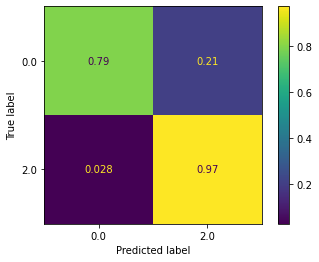

In [77]:
plot_confusion_matrix(clf, n_fts_test, y_test, normalize='true')

,count,hate_speech,offensive_language,neither,class,cleaned_tweets
0,3.0,0.0,0.0,3.0,2.0,As a woman you shouldnt complain about cleaning up your house amp as a man you should always take the trash out
40,3.0,0.0,1.0,2.0,2.0,momma said no pussy cats inside my doghouse
63,3.0,0.0,0.0,3.0,2.0,SimplyAddictedToGuys woof woof hot scally lad
66,3.0,0.0,1.0,2.0,2.0,woof woof and hot soles
67,3.0,0.0,1.0,2.0,2.0,Lemmie eat a Oreo amp do these dishes One oreo Lol
...,...,...,...,...,...,...
24767,3.0,0.0,1.0,2.0,2.0,you know what they say the early bird gets the worm puts gummy worms in your morning coffee
24776,3.0,3.0,0.0,0.0,0.0,youre all niggers
24777,3.0,2.0,1.0,0.0,0.0,youre such a retard i hope you get type diabetes and die from a sugar rush you fucking faggot
24779,3.0,0.0,1.0,2.0,2.0,youve gone and broke the wrong heart baby and drove me redneck crazy


In [36]:
###End Sentiment Section

In [37]:
print(clf)

PassiveAggressiveClassifier(n_jobs=-1, random_state=0, validation_fraction=0.05)


In [38]:
# Define a new lemmatizer
lemmatizer = WordNetLemmatizer()

# Define preprocess function: removes stop words, tokenize, and lemmatize the data passed in
def process_text(data):
    # sw = set(stopwords.words('english'))
    #regex = re.compile("[^a-zA-Z ]")
    #re_clean = regex.sub('', data)
    words = word_tokenize(data)
    #lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in words]
              # if word.lower() not in sw]
    return output

In [39]:
#Loop through df_neg_hate_tweets['cleaned_tweets'] column and append data from each row to neg_hate_tweets string
neg_hate_tweets=""

for i in df_neg_hate_tweets['cleaned_tweets']:
    neg_hate_tweets+=i+" "

In [40]:
#Loop through df_neg_tweets['cleaned_tweets'] column and append data from each row to neg_offensive_tweets string
neg_offensive_tweets=""

for i in df_neg_offensive_tweets['cleaned_tweets']:
    neg_offensive_tweets+=i+" "

In [41]:
#Loop through df_pos_tweets['cleaned_tweets'] column and append data from each row to neu_neither_tweets string
neu_neither_tweets=""

for i in df_neu_neither_tweets['cleaned_tweets']:
    neu_neither_tweets+=i+" "

In [42]:
print(neu_neither_tweets)


    As a woman you shouldnt complain about cleaning up your house amp as a man you should always take the trash out  momma said no pussy cats inside my doghouse    SimplyAddictedToGuys woof woof hot scally lad   woof woof and hot soles   Lemmie eat a Oreo amp do these dishes One oreo Lol   baby monkey bathtime Awwwwe This is soooo ADORABLE   Im an early bird and Im a night owl so Im wise and have worms   Overdosing on heavy drugs doesnt sound bad tonight I do that pussy shit every day   Pit Bulls Photographed As Lovely Fairy Tale Creatures They are fairy tale creatures   As long as the Lakers trash from now on I could careless And thats real CC hahaha   this the I play soccer cheat on girls and wear khaki coloured cargos haircut   yup   This isnt ghettoits smart Im doing this idc   Who wants to get there nose in these bad bois then hot sox and legs   Peel up peel up bring it back up rewind back where Im from they move Shaq from the line ooooow who tf said that trash  come on stay alive

In [43]:
print(neg_hate_tweets)

  LMFAOOOO I HATE BLACK PEOPLE This is why theres black people and niggers   At least Im not a nigger Lmfao   Halloween was yesterday stupid nigger   is bored supposed to be cute you faggot Sometimes   lassen cc  the coach wants me i feel it youll get more my nig no doubt   Jackies a retard  At least I can make a grilled cheese   Stacey Dash won   baddest bitch evaaaa Lets kill cracker babies WTF did I just hear WOW Nah its You       yo i thought some photoshopped my face on that faggot smmfhi hate yall These sour apple bitter bitches Im not fuckin wit em We hate niggers we hate faggots and we hate spicskkk rally Who the fuck you callin jiggaboo nigga You ol trout mouth ass bitch DEEEEAAAADD fuck you you pussy ass hater go suck a dick and die quick  Someone to me in Youtube comments I think wed be good friends on my way to fuck your bitch in the name of The Lord  Mr Race poor whitey lot of rain too bad it wasnt enough to wash away the teabagger racist white trash in the state was STRAI

In [44]:
#Pass neg_hate_tweets to process_text function and store return in processed_neg_hate_tweets
processed_neg_hate_tweets = process_text(neg_hate_tweets)
print(processed_neg_hate_tweets)

['lmfaoooo', 'i', 'hate', 'black', 'people', 'this', 'is', 'why', 'theres', 'black', 'people', 'and', 'niggers', 'at', 'least', 'im', 'not', 'a', 'nigger', 'lmfao', 'halloween', 'was', 'yesterday', 'stupid', 'nigger', 'is', 'bored', 'supposed', 'to', 'be', 'cute', 'you', 'faggot', 'sometimes', 'lassen', 'cc', 'the', 'coach', 'wants', 'me', 'i', 'feel', 'it', 'youll', 'get', 'more', 'my', 'nig', 'no', 'doubt', 'jackies', 'a', 'retard', 'at', 'least', 'i', 'can', 'make', 'a', 'grilled', 'cheese', 'stacey', 'dash', 'won', 'baddest', 'bitch', 'evaaaa', 'lets', 'kill', 'cracker', 'babies', 'wtf', 'did', 'i', 'just', 'hear', 'wow', 'nah', 'its', 'you', 'yo', 'i', 'thought', 'some', 'photoshopped', 'my', 'face', 'on', 'that', 'faggot', 'smmfhi', 'hate', 'yall', 'these', 'sour', 'apple', 'bitter', 'bitches', 'im', 'not', 'fuckin', 'wit', 'em', 'we', 'hate', 'niggers', 'we', 'hate', 'faggots', 'and', 'we', 'hate', 'spicskkk', 'rally', 'who', 'the', 'fuck', 'you', 'callin', 'jiggaboo', 'nigga', 

In [45]:
#Pass neg_offesnive_tweets to process_text function and store return in processed_neg_offesnive_tweets
processed_neg_offensive_tweets = process_text(neg_offensive_tweets)
print(processed_neg_offensive_tweets)

['dawg', 'you', 'ever', 'fuck', 'a', 'bitch', 'and', 'she', 'start', 'to', 'cry', 'you', 'be', 'confused', 'as', 'shit', 'i', 'can', 'not', 'just', 'sit', 'up', 'and', 'hate', 'on', 'another', 'bitch', 'i', 'got', 'too', 'much', 'shit', 'going', 'on', 'cause', 'im', 'tired', 'of', 'you', 'big', 'bitches', 'coming', 'for', 'us', 'skinny', 'girls', 'hobbies', 'include', 'fighting', 'mariam', 'bitch', 'keeks', 'is', 'a', 'bitch', 'she', 'curves', 'everyone', 'lol', 'i', 'walked', 'into', 'a', 'conversation', 'like', 'this', 'smh', 'murda', 'gang', 'bitch', 'its', 'gang', 'land', 'so', 'hoes', 'that', 'smoke', 'are', 'losers', 'yea', 'go', 'on', 'ig', 'bad', 'bitches', 'is', 'the', 'only', 'thing', 'that', 'i', 'like', 'bitch', 'get', 'up', 'off', 'me', 'bitch', 'nigga', 'miss', 'me', 'with', 'it', 'bitch', 'plz', 'whatever', 'bitch', 'who', 'do', 'you', 'love', 'bitches', 'get', 'cut', 'off', 'everyday', 'b', 'black', 'bottle', 'amp', 'a', 'bad', 'bitch', 'broke', 'bitch', 'cant', 'tell',

In [46]:
#Pass neu_neither_tweets to process_text function and store return in processed_neu_neither_tweets
processed_neu_neither_tweets = process_text(neu_neither_tweets)
print(processed_neu_neither_tweets)

['as', 'a', 'woman', 'you', 'shouldnt', 'complain', 'about', 'cleaning', 'up', 'your', 'house', 'amp', 'as', 'a', 'man', 'you', 'should', 'always', 'take', 'the', 'trash', 'out', 'momma', 'said', 'no', 'pussy', 'cats', 'inside', 'my', 'doghouse', 'simplyaddictedtoguys', 'woof', 'woof', 'hot', 'scally', 'lad', 'woof', 'woof', 'and', 'hot', 'soles', 'lemmie', 'eat', 'a', 'oreo', 'amp', 'do', 'these', 'dishes', 'one', 'oreo', 'lol', 'baby', 'monkey', 'bathtime', 'awwwwe', 'this', 'is', 'soooo', 'adorable', 'im', 'an', 'early', 'bird', 'and', 'im', 'a', 'night', 'owl', 'so', 'im', 'wise', 'and', 'have', 'worms', 'overdosing', 'on', 'heavy', 'drugs', 'doesnt', 'sound', 'bad', 'tonight', 'i', 'do', 'that', 'pussy', 'shit', 'every', 'day', 'pit', 'bulls', 'photographed', 'as', 'lovely', 'fairy', 'tale', 'creatures', 'they', 'are', 'fairy', 'tale', 'creatures', 'as', 'long', 'as', 'the', 'lakers', 'trash', 'from', 'now', 'on', 'i', 'could', 'careless', 'and', 'thats', 'real', 'cc', 'hahaha', '

In [47]:
#count items in processed_neg_tweets
neg_counts = Counter(processed_neg_hate_tweets)
neg_counts

Counter({'lmfaoooo': 1,
         'i': 184,
         'hate': 48,
         'black': 20,
         'people': 24,
         'this': 55,
         'is': 90,
         'why': 12,
         'theres': 6,
         'and': 101,
         'niggers': 17,
         'at': 28,
         'least': 4,
         'im': 43,
         'not': 27,
         'a': 298,
         'nigger': 93,
         'lmfao': 7,
         'halloween': 1,
         'was': 22,
         'yesterday': 1,
         'stupid': 28,
         'bored': 1,
         'supposed': 2,
         'to': 138,
         'be': 59,
         'cute': 2,
         'you': 246,
         'faggot': 164,
         'sometimes': 2,
         'lassen': 1,
         'cc': 1,
         'the': 183,
         'coach': 2,
         'wants': 3,
         'me': 59,
         'feel': 6,
         'it': 45,
         'youll': 1,
         'get': 39,
         'more': 13,
         'my': 63,
         'nig': 4,
         'no': 31,
         'doubt': 3,
         'jackies': 1,
         'retard': 14,
        

In [48]:
#count items in processed_neg_offesnive_tweets
neg_offensive_counts = Counter(processed_neg_offensive_tweets)
neg_offensive_counts

Counter({'dawg': 18,
         'you': 2597,
         'ever': 97,
         'fuck': 1065,
         'a': 3905,
         'bitch': 6326,
         'and': 1337,
         'she': 477,
         'start': 60,
         'to': 1775,
         'cry': 39,
         'be': 918,
         'confused': 11,
         'as': 237,
         'shit': 864,
         'i': 3151,
         'can': 287,
         'not': 356,
         'just': 521,
         'sit': 39,
         'up': 662,
         'hate': 338,
         'on': 917,
         'another': 70,
         'got': 663,
         'too': 202,
         'much': 92,
         'going': 104,
         'cause': 130,
         'im': 913,
         'tired': 47,
         'of': 690,
         'big': 99,
         'bitches': 2398,
         'coming': 24,
         'for': 671,
         'us': 55,
         'skinny': 33,
         'girls': 81,
         'hobbies': 3,
         'include': 2,
         'fighting': 12,
         'mariam': 1,
         'keeks': 1,
         'is': 1015,
         'curves': 1,
    

In [49]:
#count negative tweets and store in new dataframe
df_neg_tweet_counts = pd.DataFrame.from_dict(neg_counts.items(), orient='columns')
df_neg_tweet_counts.rename(columns={0: "word", 1: "count"}, inplace =True)
df_neg_tweet_counts.head()

,word,count
0,lmfaoooo,1
1,i,184
2,hate,48
3,black,20
4,people,24


In [50]:
#sort negative tweet counts and store in new dataframe
df_neg_tweet_counts_sorted = df_neg_tweet_counts.sort_values(by='count', ascending=False).reset_index()
df_neg_tweet_counts_sorted.head(200)

,index,word,count
0,15,a,298
1,27,you,246
2,1,i,184
3,32,the,183
4,55,bitch,178
5,28,faggot,164
6,24,to,138
7,97,ass,128
8,90,fuck,102
9,9,and,101


In [51]:
print(dict(neg_counts))

{'lmfaoooo': 1, 'i': 184, 'hate': 48, 'black': 20, 'people': 24, 'this': 55, 'is': 90, 'why': 12, 'theres': 6, 'and': 101, 'niggers': 17, 'at': 28, 'least': 4, 'im': 43, 'not': 27, 'a': 298, 'nigger': 93, 'lmfao': 7, 'halloween': 1, 'was': 22, 'yesterday': 1, 'stupid': 28, 'bored': 1, 'supposed': 2, 'to': 138, 'be': 59, 'cute': 2, 'you': 246, 'faggot': 164, 'sometimes': 2, 'lassen': 1, 'cc': 1, 'the': 183, 'coach': 2, 'wants': 3, 'me': 59, 'feel': 6, 'it': 45, 'youll': 1, 'get': 39, 'more': 13, 'my': 63, 'nig': 4, 'no': 31, 'doubt': 3, 'jackies': 1, 'retard': 14, 'can': 18, 'make': 6, 'grilled': 1, 'cheese': 1, 'stacey': 1, 'dash': 1, 'won': 1, 'baddest': 1, 'bitch': 178, 'evaaaa': 1, 'lets': 4, 'kill': 27, 'cracker': 9, 'babies': 4, 'wtf': 4, 'did': 6, 'just': 31, 'hear': 1, 'wow': 4, 'nah': 5, 'its': 19, 'yo': 22, 'thought': 8, 'some': 19, 'photoshopped': 1, 'face': 7, 'on': 54, 'that': 93, 'smmfhi': 1, 'yall': 16, 'these': 28, 'sour': 1, 'apple': 1, 'bitter': 1, 'bitches': 49, 'fuck

In [52]:
print(dict(neg_counts.most_common(10)))

{'a': 298, 'you': 246, 'i': 184, 'the': 183, 'bitch': 178, 'faggot': 164, 'to': 138, 'ass': 128, 'fuck': 102, 'and': 101}


In [53]:
#Ngram for negative hate tweets
ngram_hate_counts = Counter(ngrams(processed_neg_hate_tweets, n=3))
print(dict(ngram_hate_counts))

TypeError: 'list' object is not callable

In [ ]:
print(dict(ngram_hate_counts.most_common(20)))

In [ ]:
#Ngram for negative offensive tweets
ngram_offensive_counts = Counter(ngrams(processed_neg_offensive_tweets, n=3))
print(dict(ngram_offensive_counts))

In [ ]:
print(dict(ngram_offensive_counts.most_common(20)))

In [ ]:
#Ngram for neither tweets
ngram_neither_counts = Counter(ngrams(processed_neu_neither_tweets, n=3))
print(dict(ngram_neither_counts))

In [ ]:
print(dict(ngram_neither_counts.most_common(20)))

In [ ]:
df_neg_hate_tweet_phrases = pd.DataFrame.from_dict(ngram_hate_counts.items(), orient='columns')
df_neg_hate_tweet_phrases.rename(columns={0: "3_word_phrase", 1: "count"}, inplace =True)
df_neg_hate_tweet_phrases.head()

In [ ]:
df_neg_hate_tweet_phrases_sorted = df_neg_hate_tweet_phrases.sort_values(by='count', ascending=False)
df_neg_hate_tweet_phrases_sorted.head()

In [ ]:
df_ngram_offensive_counts_phrases = pd.DataFrame.from_dict(ngram_offensive_counts.items(), orient='columns')
df_ngram_offensive_counts_phrases.rename(columns={0: "3_word_phrase", 1: "count"}, inplace =True)
df_ngram_offensive_counts_phrases.head()

In [ ]:
df_ngram_offensive_counts_phrases_sorted = df_ngram_offensive_counts_phrases.sort_values(by='count', ascending=False)
df_ngram_offensive_counts_phrases_sorted.head()

In [ ]:
df_ngram_neither_counts_phrases = pd.DataFrame.from_dict(ngram_neither_counts.items(), orient='columns')
df_ngram_neither_counts_phrases.rename(columns={0: "3_word_phrase", 1: "count"}, inplace =True)
df_ngram_neither_counts_phrases.head()

In [ ]:
df_ngram_neither_counts_phrases_sorted = df_ngram_neither_counts_phrases.sort_values(by='count', ascending=False)
df_ngram_neither_counts_phrases_sorted.head()

In [ ]:
###### START  NAIVE BAYES  ######

In [ ]:
train_hate_tweets= processed_neg_hate_tweets
#row = 0
#for i in df_neg_hate_tweets['cleaned_tweets']:
#    train_hate_tweets.append(i)

In [ ]:
train_offensive_tweets=[]
row = 0
for i in df_neg_offensive_tweets['cleaned_tweets']:
    train_offensive_tweets.append(i)

In [ ]:
train_neu_tweets=[]
row = 0
for i in df_neu_neither_tweets['cleaned_tweets']:
    train_neu_tweets.append(i)

In [ ]:
test_neg_tweets=[]
row = 0
for i in df_neg_tweets['cleaned_tweets']:
    test_neg_tweets.append(i)

In [ ]:
test_neu_tweets=[]
row = 0
for i in df_neu_tweets['cleaned_tweets']:
    test_neu_tweets.append(i)

In [ ]:
#test_emails = {'hate':train_spam, 'spam2':train_spam2, 'ham':train_ham}
test_tweets = {'negative':test_neg_tweets, 'neither':test_neu_tweets}

In [ ]:
# make a vocabulary of unique words that occur in known hate tweets

vocab_words_hate = []

for sentence in train_hate_tweets:
    sentence_as_list = sentence.split()
    for word in sentence_as_list:
        vocab_words_hate.append(word)     
        
print(vocab_words_hate)

In [ ]:
vocab_unique_words_hate = list(dict.fromkeys(vocab_words_hate))
print(vocab_unique_words_hate)

In [ ]:
dict_hate_words = {}
word = []
hate = []
for w in vocab_unique_words_hate:
    tweets_with_w = 0     # counter
    for sentence in train_hate_tweets:
        if w in sentence:
            tweets_with_w+=1
            
    print(f"Number of hate tweets with the word {w}: {tweets_with_w}")
    total_hate_tweets = len(train_hate_tweets)
    hate_factor = (tweets_with_w+1)/(total_hate_tweets+2)
    print(f"hate factor of the word '{w}': {hate_factor} \n")
    dict_hate_words[w.lower()] = hate_factor
#     word.append(w.lower())
#     hate.append(hate_factor)
# hate_df = pd.DataFrame({"word": word, "hate_factor": hate})

In [ ]:
hate_df.sort_values(by='hate_factor')

In [ ]:
print(dict_hate_words)

In [ ]:
# make a vocabulary of unique words that occur in known ham emails

vocab_words_neu = []

for sentence in train_neu_tweets:
    sentence_as_list = sentence.split()
    for word in sentence_as_list:
        vocab_words_neu.append(word)
        
vocab_unique_words_neu = list(dict.fromkeys(vocab_words_neu))
print(vocab_unique_words_neu)

dict_neutral_words = {}
for w in vocab_unique_words_neu:
    tweets_with_w = 0     # counter
    for sentence in train_neu_tweets:
        if w in sentence:
            print(w+":", sentence)
            tweets_with_w+=1
            
    print(f"Number of neutral tweets with the word '{w}': {tweets_with_w}")
    
    total_neutral_tweets = len(train_neu_tweets)
    Neutrality = (tweets_with_w+1)/(total_neutral_tweets+2)       # Smoothing applied
    print(f"Neutrality of the word '{w}': {Neutrality} ")
    
    dict_neutral_words[w.lower()] = Neutrality
                                         # Use built-in lower() to keep all words lower case - useful later when 
                                         # comparing hatefulness vs neutrality of a single word - e.g. 'Your' and
                                         # 'your' will be treated as 2 different words if not normalized to lower
                                        # case.

In [ ]:
print(dict_neutral_words)

In [ ]:
prob_hate = len(train_hate_tweets) / (len(train_hate_tweets)+(len(train_neu_tweets)))
print(prob_hate)

In [ ]:
prob_neu = len(train_neu_tweets) / (len(train_hate_tweets)+(len(train_neu_tweets)))
print(prob_neu)

In [ ]:
tests = []
for i in test_tweets['negative']:
    tests.append(i)
    
for i in test_tweets['neither']:
    tests.append(i)
    
print(tests)    

In [ ]:
# split emails into distinct words

distinct_words_as_sentences_test = []

for sentence in tests:
    sentence_as_list = sentence.split()
    senten = []
    for word in sentence_as_list:
        senten.append(word)
    distinct_words_as_sentences_test.append(senten)

In [ ]:
print(distinct_words_as_sentences_test)

In [ ]:
test_hate_tokenized = distinct_words_as_sentences_test
test_neu_tokenized = [distinct_words_as_sentences_test[2], distinct_words_as_sentences_test[3]]
print(test_hate_tokenized)

In [ ]:
reduced_sentences_hate_test = []
for sentence in test_hate_tokenized:
    words_ = []
    for word in sentence:
        if word in vocab_unique_words_hate:
            print(f"'{word}', ok")
            words_.append(word)
        elif word in vocab_unique_words_neu:
            print(f"'{word}', ok")
            words_.append(word)
        else:
            print(f"'{word}', word not present in labelled hate training data")
    reduced_sentences_hate_test.append(words_)
print(reduced_sentences_hate_test)

In [ ]:
reduced_sentences_neu_test = []                   # repeat for ham words
for sentence in test_neu_tokenized:
    words_ = []
    for word in sentence:
        if word in vocab_unique_words_neu:
            print(f"'{word}', ok")
            words_.append(word)
        elif word in vocab_unique_words_hate:
            print(f"'{word}', ok")
            words_.append(word)
        else:
            print(f"'{word}', word not present in labelled neutral training data")
    reduced_sentences_neu_test.append(words_)
print(reduced_sentences_neu_test)

In [ ]:
test_hate_stemmed = []
non_key = ['us',  'the', 'of','your']       # non-key words, gathered from spam,ham and test sentences
for tweet in reduced_sentences_hate_test:
    tweet_stemmed=[]
    for word in tweet:
        if word in non_key:
            print('remove')
        else:
            tweet_stemmed.append(word)
    test_hate_stemmed.append(tweet_stemmed)
            
print(test_hate_stemmed)

In [ ]:
test_neu_stemmed = []
non_key = ['us',  'the', 'of', 'your'] 
for tweet in reduced_sentences_neu_test:
    tweet_stemmed=[]
    for word in tweet:
        if word in non_key:
            print('remove')
        else:
            tweet_stemmed.append(word)
    test_neu_stemmed.append(tweet_stemmed)
            
print(test_neu_stemmed)

In [ ]:
def mult(list_) :        # function to multiply all word probs together 
    total_prob = 1
    for i in list_: 
         total_prob = total_prob * i  
    return total_prob

In [ ]:
def Bayes(tweet):
    probs = []
    for word in tweet:
        Pr_H = prob_hate
        print('prob of hate in general ',Pr_H)
        try:
            Pr_HS = dict_hate_words[word]
            print(f'prob "{word}"  is a hate word : {Pr_HS}')
        except KeyError:
            Pr_HS = 1/(total_hate_tweets+2)  # Apply smoothing for word not seen in hate training data, but seen in neu training 
            print(f"prob '{word}' is a hate word: {Pr_HS}")
            
        Pr_N = prob_neu
        print('prob of neutral in general ', Pr_N)
        try:
            Pr_NW = dict_neutral_words[word]
            print(f'prob "{word}" is a neutral word: ',Pr_NW)
        except KeyError:
            Pr_NW = (1/(total_neutral_tweets+2))  # Apply smoothing for word not seen in neu training data, but seen in hate training
            print(f"NW for {word} is {Pr_NW}")
            print(f"prob '{word}' is a neutral word: {Pr_NW}")
        
        prob_word_is_hate_BAYES = (Pr_HS*Pr_H)/((Pr_HS*Pr_H)+(Pr_NW*Pr_N))
        print('')
        print(f"Using Bayes, prob the the word '{word}' is hate: {prob_word_is_hate_BAYES}")
        print('______________________________________')
        probs.append(prob_word_is_hate_BAYES)
    print(f"All word probabilities for this sentence: {probs}")
    final_classification = mult(probs)
    if final_classification >= 0.5:
        print(f'tweet is hate: with confidence of {final_classification*100}%')
    else:
        print(f'tweet is neutral: with confidence of {final_classification*100}%')
        print('______________________________________')
    return final_classification

In [ ]:
for tweet in test_hate_stemmed:
    print('')
    print(f"           Testing stemmed hate tweet {tweet} :")
    print('                 Test word by word: ')
    all_word_probs = Bayes(tweet)
    print(all_word_probs)

In [ ]:
for tweet in test_neu_stemmed:
    print('')
    print(f"           Testing stemmed neutral tweet {tweet} :")
    print('                 Test word by word: ')
    all_word_probs = Bayes(tweet)
    print(all_word_probs)

In [ ]:
###### END NAIVE BAYES  ######